In [1]:
import nltk
nltk.download("brown")
nltk.download("webtext")
nltk.download("reuters")
nltk.download("punkt_tab")
from nltk.corpus import brown, webtext, reuters
brown_corpus = brown.sents()
brown_corpus = [" ".join(sentence) for sentence in brown_corpus]
brown_corpus = ["<s> " + sentence + " </s>" for sentence in brown_corpus][:5000]
webtext_corpus = webtext.sents()
webtext_corpus = [" ".join(sentence) for sentence in webtext_corpus]
webtext_corpus = ["<s> " + sentence + " </s>" for sentence in webtext_corpus][:5000]
reuters_corpus = reuters.sents()
reuters_corpus = [" ".join(sentence) for sentence in reuters_corpus]
reuters_corpus = ["<s> " + sentence + " </s>" for sentence in reuters_corpus][:5000]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### 1. Write a function that calculates the unigram probability of a word appearing in some corpus.

In [2]:
from collections import Counter

In [3]:
def prob(word, corpus):
  tokens = [token for sentence in corpus for token in sentence.split()]
  N= len(tokens)
  word_count=Counter(tokens)
  if N >0 :
    return word_count[word]/N
  else:
    return 0

In [4]:
prob('this', brown_corpus)

0.0023498496601561513

In [5]:
prob('this', webtext_corpus)

0.0020853762175589985

### 2. Create the bigram model

In [6]:
def bigrams_in_sentence(corpus):
  output=[]
  words=[token for sentence in corpus for token in sentence.split()]
  for i in range(len(words)-1):
    output.append((words[i],words[i+1]))
  return output

## Bigram_Brown

In [7]:
bigrams_brown = bigrams_in_sentence(brown_corpus)
bigrams_brown

[('<s>', 'The'),
 ('The', 'Fulton'),
 ('Fulton', 'County'),
 ('County', 'Grand'),
 ('Grand', 'Jury'),
 ('Jury', 'said'),
 ('said', 'Friday'),
 ('Friday', 'an'),
 ('an', 'investigation'),
 ('investigation', 'of'),
 ('of', "Atlanta's"),
 ("Atlanta's", 'recent'),
 ('recent', 'primary'),
 ('primary', 'election'),
 ('election', 'produced'),
 ('produced', '``'),
 ('``', 'no'),
 ('no', 'evidence'),
 ('evidence', "''"),
 ("''", 'that'),
 ('that', 'any'),
 ('any', 'irregularities'),
 ('irregularities', 'took'),
 ('took', 'place'),
 ('place', '.'),
 ('.', '</s>'),
 ('</s>', '<s>'),
 ('<s>', 'The'),
 ('The', 'jury'),
 ('jury', 'further'),
 ('further', 'said'),
 ('said', 'in'),
 ('in', 'term-end'),
 ('term-end', 'presentments'),
 ('presentments', 'that'),
 ('that', 'the'),
 ('the', 'City'),
 ('City', 'Executive'),
 ('Executive', 'Committee'),
 ('Committee', ','),
 (',', 'which'),
 ('which', 'had'),
 ('had', 'over-all'),
 ('over-all', 'charge'),
 ('charge', 'of'),
 ('of', 'the'),
 ('the', 'election

In [8]:
brown_corpus_Voc = set(token for sentence in brown_corpus for token in sentence.split())
brown_corpus_Voc_len = len(brown_corpus_Voc)

In [9]:
def conditional_prob_bg(prev, word, bigrams, Voc_len):
  count_prev = 0
  count_prev_word = 0
  for element in bigrams:
    if element[0] == prev:
      count_prev += 1
      if element[1] == word :
        count_prev_word += 1



  cond_prob = (count_prev_word + 1) / (count_prev + Voc_len)
  return cond_prob

In [10]:

print(conditional_prob_bg('Fulton','County', bigrams_brown, brown_corpus_Voc_len))

0.00046357615894039735


In [11]:
def predict_next_word_bg(word, bigrams, Voc_len):
  prob={}
  for element in bigrams:
    if element[0]==word :
        x=conditional_prob_bg(element[0],element[1],bigrams,Voc_len)
        prob[element[1]]=x
  return max(prob, key=prob.get)

In [12]:
predict_next_word_bg("is", bigrams_brown, brown_corpus_Voc_len)

'a'

In [13]:
def bigram_brown_predict_sentence(sentence, bigrams, Voc_len, limit):
  words=sentence.split()
  len_words=len(words)
  for i in range(len_words, limit):
        next_word = predict_next_word_bg(sentence.split()[-1], bigrams, Voc_len)
        if next_word == "</s>":
            break
        sentence += " " + next_word

  print(sentence)

In [14]:
bigram_brown_predict_sentence("That election",bigrams_brown,brown_corpus_Voc_len,9)

That election , and the first time .


#### Bigram_Webtext

In [15]:
bigrams_webtext = bigrams_in_sentence(webtext_corpus)
bigrams_webtext

[('<s>', 'Cookie'),
 ('Cookie', 'Manager'),
 ('Manager', ':'),
 (':', '"'),
 ('"', 'Don'),
 ('Don', "'"),
 ("'", 't'),
 ('t', 'allow'),
 ('allow', 'sites'),
 ('sites', 'that'),
 ('that', 'set'),
 ('set', 'removed'),
 ('removed', 'cookies'),
 ('cookies', 'to'),
 ('to', 'set'),
 ('set', 'future'),
 ('future', 'cookies'),
 ('cookies', '"'),
 ('"', 'should'),
 ('should', 'stay'),
 ('stay', 'checked'),
 ('checked', 'When'),
 ('When', 'in'),
 ('in', 'full'),
 ('full', 'screen'),
 ('screen', 'mode'),
 ('mode', 'Pressing'),
 ('Pressing', 'Ctrl'),
 ('Ctrl', '-'),
 ('-', 'N'),
 ('N', 'should'),
 ('should', 'open'),
 ('open', 'a'),
 ('a', 'new'),
 ('new', 'browser'),
 ('browser', 'when'),
 ('when', 'only'),
 ('only', 'download'),
 ('download', 'dialog'),
 ('dialog', 'is'),
 ('is', 'left'),
 ('left', 'open'),
 ('open', 'add'),
 ('add', 'icons'),
 ('icons', 'to'),
 ('to', 'context'),
 ('context', 'menu'),
 ('menu', 'So'),
 ('So', 'called'),
 ('called', '"'),
 ('"', 'tab'),
 ('tab', 'bar'),
 ('bar',

In [16]:
def unigram_gen(corpus):
  webtext_corpus_Voc = set(token for sentence in corpus for token in sentence.split())
  return webtext_corpus_Voc
webtext_corpus_Voc_len = len(unigram_gen(webtext_corpus))


In [17]:
print(conditional_prob_bg('This','is', bigrams_webtext, webtext_corpus_Voc_len))

0.0013987236646560014


In [18]:
predict_next_word_bg("is", bigrams_webtext, webtext_corpus_Voc_len)

'not'

In [19]:
bigram_brown_predict_sentence("That is",bigrams_webtext, webtext_corpus_Voc_len,9)

That is not work in the page is not


## Trigram_Brown

In [20]:
def trigrams_in_sentence(corpus):
  output=[]
  words=[token for sentence in corpus for token in sentence.split()]
  for i in range(len(words)-2):
    output.append((words[i],words[i+1], words[i+2]))
  return output

In [21]:
trigrams_brown = trigrams_in_sentence(brown_corpus)
trigrams_brown

[('<s>', 'The', 'Fulton'),
 ('The', 'Fulton', 'County'),
 ('Fulton', 'County', 'Grand'),
 ('County', 'Grand', 'Jury'),
 ('Grand', 'Jury', 'said'),
 ('Jury', 'said', 'Friday'),
 ('said', 'Friday', 'an'),
 ('Friday', 'an', 'investigation'),
 ('an', 'investigation', 'of'),
 ('investigation', 'of', "Atlanta's"),
 ('of', "Atlanta's", 'recent'),
 ("Atlanta's", 'recent', 'primary'),
 ('recent', 'primary', 'election'),
 ('primary', 'election', 'produced'),
 ('election', 'produced', '``'),
 ('produced', '``', 'no'),
 ('``', 'no', 'evidence'),
 ('no', 'evidence', "''"),
 ('evidence', "''", 'that'),
 ("''", 'that', 'any'),
 ('that', 'any', 'irregularities'),
 ('any', 'irregularities', 'took'),
 ('irregularities', 'took', 'place'),
 ('took', 'place', '.'),
 ('place', '.', '</s>'),
 ('.', '</s>', '<s>'),
 ('</s>', '<s>', 'The'),
 ('<s>', 'The', 'jury'),
 ('The', 'jury', 'further'),
 ('jury', 'further', 'said'),
 ('further', 'said', 'in'),
 ('said', 'in', 'term-end'),
 ('in', 'term-end', 'presentmen

In [22]:
def conditional_prob_tg(prev_prev, prev, word, trigrams, Voc_len):
  count_prev_prevprev = 0
  count_prev_to_word = 0
  for element in trigrams:
    if element[0] == prev_prev and element[1] == prev:
      count_prev_prevprev += 1
      if element[2] == word :
        count_prev_to_word += 1



  cond_prob = (count_prev_to_word + 1) / (count_prev_prevprev + Voc_len)
  return cond_prob

In [23]:
print(conditional_prob_tg('The','Fulton','County', trigrams_brown, brown_corpus_Voc_len))

0.00013256445946841652


In [24]:
def predict_next_word_tg(prev, word, trigrams, Voc_len):
  prob={}
  for element in trigrams:
    if element[0]== prev and element[1]==word :
        x=conditional_prob_tg(element[0],element[1],element[2],trigrams,Voc_len)
        prob[element[2]]=x
  return max(prob, key=prob.get)

In [25]:
predict_next_word_tg("This","is", trigrams_brown, brown_corpus_Voc_len)

'a'

In [26]:
def trigram_brown_predict_sentence(sentence, trigrams, Voc_len, limit):
  words=sentence.split()
  len_words=len(words)
  for i in range(len_words, limit):
        next_word = predict_next_word_tg(sentence.split()[-2],sentence.split()[-1],trigrams, Voc_len)
        if next_word == "</s>":
            break
        sentence += " " + next_word

  print(sentence)

In [27]:
trigram_brown_predict_sentence("<s> This is",trigrams_brown,brown_corpus_Voc_len,10 )

<s> This is a little more than a year earlier


### Trigram_Webtext

In [28]:
trigrams_webtext = trigrams_in_sentence(webtext_corpus)
trigrams_webtext

[('<s>', 'Cookie', 'Manager'),
 ('Cookie', 'Manager', ':'),
 ('Manager', ':', '"'),
 (':', '"', 'Don'),
 ('"', 'Don', "'"),
 ('Don', "'", 't'),
 ("'", 't', 'allow'),
 ('t', 'allow', 'sites'),
 ('allow', 'sites', 'that'),
 ('sites', 'that', 'set'),
 ('that', 'set', 'removed'),
 ('set', 'removed', 'cookies'),
 ('removed', 'cookies', 'to'),
 ('cookies', 'to', 'set'),
 ('to', 'set', 'future'),
 ('set', 'future', 'cookies'),
 ('future', 'cookies', '"'),
 ('cookies', '"', 'should'),
 ('"', 'should', 'stay'),
 ('should', 'stay', 'checked'),
 ('stay', 'checked', 'When'),
 ('checked', 'When', 'in'),
 ('When', 'in', 'full'),
 ('in', 'full', 'screen'),
 ('full', 'screen', 'mode'),
 ('screen', 'mode', 'Pressing'),
 ('mode', 'Pressing', 'Ctrl'),
 ('Pressing', 'Ctrl', '-'),
 ('Ctrl', '-', 'N'),
 ('-', 'N', 'should'),
 ('N', 'should', 'open'),
 ('should', 'open', 'a'),
 ('open', 'a', 'new'),
 ('a', 'new', 'browser'),
 ('new', 'browser', 'when'),
 ('browser', 'when', 'only'),
 ('when', 'only', 'downlo

In [29]:
print(conditional_prob_tg('This','is','a', trigrams_webtext, webtext_corpus_Voc_len))

0.000175530981218185


In [30]:
predict_next_word_tg("That","is", trigrams_webtext, webtext_corpus_Voc_len)

'why'

In [31]:
trigram_brown_predict_sentence("<s> That is",trigrams_webtext, webtext_corpus_Voc_len,10 )

<s> That is why I am your king !


In [32]:
print(brown_corpus)

["<s> The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . </s>", "<s> The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted . </s>", "<s> The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. . </s>", "<s> `` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' . </s>", "<s> The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' . </

In [33]:
import random
import math

### Perplexity

In [54]:
def corpus_sentence(corpus):
  random.seed(42)
  random_25_sentences=random.sample(corpus, 25)
  return (random_25_sentences)

In [55]:
def perplexity_bg(brown_corpus_sentences, bigrams, Voc_len):
  s={}
  for element in brown_corpus_sentences:
    words = element.split()
    word_len = len(words)

    p=1
    for i in range(1,(word_len)):
        p = p * conditional_prob_bg(words[i-1], words[i],bigrams, Voc_len )


    per = p ** (-1/word_len)
    s[element]=per
  return s




In [56]:
bc_sentences = corpus_sentence(brown_corpus)
print(bc_sentences)

['<s> Party leaders came out of the final meeting apparently satisfied and stated that complete agreement had been reached on a solution to the crisis created by the elections which left no party with enough strength to form a government on its own . </s>', "<s> Judge Parsons leaned over the bench and inquired , `` You mean some of the defendants made statements admitting this '' ? ? </s>", '<s> However , three of the managers did say that they would agree to attend the proposed meeting if all of the other managers decided to attend . </s>', '<s> Ultimately the development will comprise 300 units , in two-story and three-story structures . </s>', '<s> Mrs. Richard Newburger is chairman of hostesses . </s>', "<s> `` Once you get the feel of it , there's not much to it . </s>", '<s> Samuel D. Goodis , representing the Philadelphia Hotel Association , objected on Tuesday to a proposed boost by the city in licensing fees , saying that occupancy rates in major hotels here ranged from 48 to 

In [57]:

perplexity_bg(bc_sentences, bigrams_brown, brown_corpus_Voc_len)

{'<s> Party leaders came out of the final meeting apparently satisfied and stated that complete agreement had been reached on a solution to the crisis created by the elections which left no party with enough strength to form a government on its own . </s>': 2610.6214263561087,
 "<s> Judge Parsons leaned over the bench and inquired , `` You mean some of the defendants made statements admitting this '' ? ? </s>": 1610.1982342970668,
 '<s> However , three of the managers did say that they would agree to attend the proposed meeting if all of the other managers decided to attend . </s>': 1333.4188360518672,
 '<s> Ultimately the development will comprise 300 units , in two-story and three-story structures . </s>': 2007.1296285280957,
 '<s> Mrs. Richard Newburger is chairman of hostesses . </s>': 685.9106793935571,
 "<s> `` Once you get the feel of it , there's not much to it . </s>": 1264.9681581122009,
 '<s> Samuel D. Goodis , representing the Philadelphia Hotel Association , objected on Tu

In [58]:
def perplexity_tg(brown_corpus_sentences, trigrams, Voc_len):
  s={}
  for element in brown_corpus_sentences:
    words = element.split()
    word_len = len(words)
    p=1
    for i in range(2,(word_len)):
      p=p*conditional_prob_tg(words[i-2], words[i-1], words[i], trigrams, Voc_len)
    per = p ** (-1/word_len)
    s[element]=per
  return s



In [59]:
perplexity_tg(bc_sentences, trigrams_brown, brown_corpus_Voc_len)

{'<s> Party leaders came out of the final meeting apparently satisfied and stated that complete agreement had been reached on a solution to the crisis created by the elections which left no party with enough strength to form a government on its own . </s>': 4737.159342802886,
 "<s> Judge Parsons leaned over the bench and inquired , `` You mean some of the defendants made statements admitting this '' ? ? </s>": 2435.4593039673177,
 '<s> However , three of the managers did say that they would agree to attend the proposed meeting if all of the other managers decided to attend . </s>': 3289.3535730167264,
 '<s> Ultimately the development will comprise 300 units , in two-story and three-story structures . </s>': 2410.073573556025,
 '<s> Mrs. Richard Newburger is chairman of hostesses . </s>': 1133.948695012046,
 "<s> `` Once you get the feel of it , there's not much to it . </s>": 2125.2156092726304,
 '<s> Samuel D. Goodis , representing the Philadelphia Hotel Association , objected on Tues

In [68]:
import pandas as pd

def perplexity_dataframe_1(brown_corpus_sentences, bigrams, trigrams, Voc_len):
    # Compute perplexities for bigrams and trigrams
    bg_perplexities = perplexity_bg(brown_corpus_sentences, bigrams, Voc_len)
    tg_perplexities = perplexity_tg(brown_corpus_sentences, trigrams, Voc_len)

    # Create DataFrame
    df = pd.DataFrame({
        "Sentence": brown_corpus_sentences,
        "Bigram Perplexity": [bg_perplexities[element] for element in brown_corpus_sentences],
        "Trigram Perplexity": [tg_perplexities[element] for element in brown_corpus_sentences]
    })

    return df

Report 1

In [69]:
df=perplexity_dataframe_1(bc_sentences, bigrams_brown,trigrams_brown,brown_corpus_Voc_len)
df

,Sentence,Bigram Perplexity,Trigram Perplexity
0,<s> Party leaders came out of the final meetin...,2610.621426,4737.159343
1,<s> Judge Parsons leaned over the bench and in...,1610.198234,2435.459304
2,"<s> However , three of the managers did say th...",1333.418836,3289.353573
3,<s> Ultimately the development will comprise 3...,2007.129629,2410.073574
4,<s> Mrs. Richard Newburger is chairman of host...,685.910679,1133.948695
5,"<s> `` Once you get the feel of it , there's n...",1264.968158,2125.215609
6,"<s> Samuel D. Goodis , representing the Philad...",3117.439014,4427.072953
7,"<s> Already , however , several of the turnpik...",1658.597160,2681.938261
8,<s> But from a historic viewpoint none can app...,959.037083,1385.971963
9,"<s> When it was not , one of the great dramas ...",686.372410,2126.680061


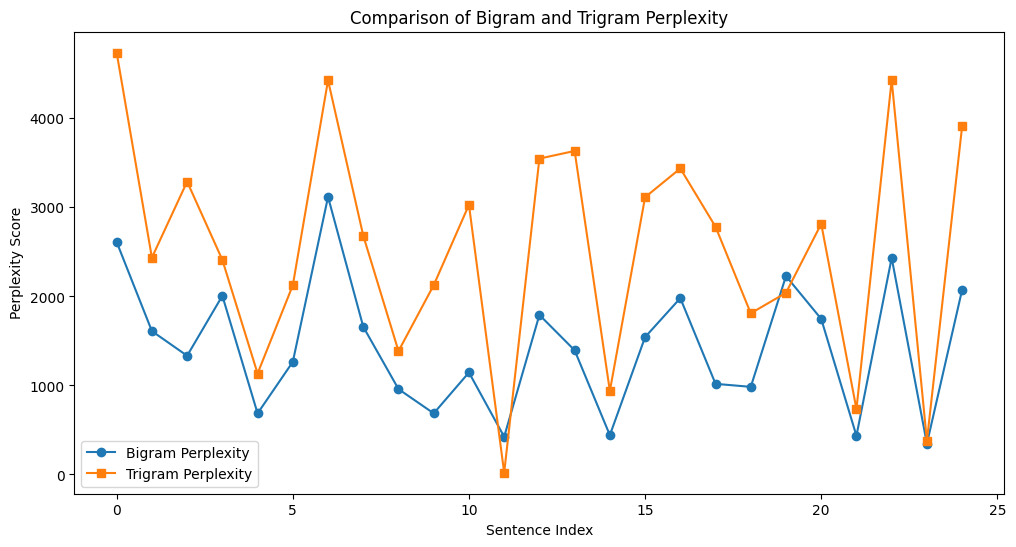

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Bigram Perplexity"], marker='o', linestyle='-', label="Bigram Perplexity")
plt.plot(df.index, df["Trigram Perplexity"], marker='s', linestyle='-', label="Trigram Perplexity")
plt.xlabel("Sentence Index")
plt.ylabel("Perplexity Score")
plt.title("Comparison of Bigram and Trigram Perplexity")
plt.legend()
plt.show()

In [66]:
print(df.columns)

Index(['Sentence', 'BG wrt BrownCorpus', 'BG wrt WebTextCorpus'], dtype='object')


In [63]:
rc_sentences = corpus_sentence(reuters_corpus)
print(rc_sentences)

['<s> Prior year earnings restated to reflect recapitalization plan . </s>', '<s> The prospective plant would cost an estimated 270 mln Canadian dlrs and would produce methyl tertiary butyl ether ( MTBE ) from raw materials available locally , it said . </s>', '<s> Taking the midpoint of 180 mln tonnes as the target and the 1986 / 87 estimated production of around 151 mln tonnes , the gap of 29 mln tonnes has to be made up during the remaining three years of the plan by increasing grain output annually by more than nine mln tonnes . </s>', '<s> C . O . M . B . & lt ; CMCO > MAKES ACQUISITION C . O . M . B . Co said it has acquired the principal assets of National Tech Industries Inc and Telkom Corp , which are engaged in the sale and telemarketing of consumer electronic merchandise and do business as House of Imports and N . L . </s>', '<s> " The problem is that the changes needed in fiscal and trade policies to redress current imbalances are of a different timescale than currency mark

Report 2 :      

In [67]:

bg_perplexities_brown_corpus = perplexity_bg(rc_sentences, bigrams_brown, brown_corpus_Voc_len)
bg_perplexities_webtext_corpus = perplexity_bg(rc_sentences, bigrams_webtext, webtext_corpus_Voc_len)

# Create DataFrame
df2 = pd.DataFrame({
    "Sentence": rc_sentences,
    "BG wrt BrownCorpus": [bg_perplexities_brown_corpus.get(sentence, float("inf")) for sentence in rc_sentences],
    "BG wrt WebTextCorpus": [bg_perplexities_webtext_corpus.get(sentence, float("inf")) for sentence in rc_sentences]
})

df2



,Sentence,BG wrt BrownCorpus,BG wrt WebTextCorpus
0,<s> Prior year earnings restated to reflect re...,2561.406675,1997.716017
1,<s> The prospective plant would cost an estima...,4469.019684,4877.310818
2,<s> Taking the midpoint of 180 mln tonnes as t...,4868.913609,5274.101861
3,<s> C . O . M . B . & lt ; CMCO > MAKES ACQUIS...,8084.720449,7672.665958
4,"<s> "" The problem is that the changes needed i...",6480.656854,4547.735977
5,<s> UNION TEXAS OIL RESERVES DROPPED IN 1986 U...,7167.897819,5789.831237
6,"<s> Excluding Brazil , non - accruing loans at...",7012.889855,5089.698655
7,<s> PENTLAND TO REDUCE REEBOK & lt ; RBK > HOL...,7087.985018,5972.582048
8,<s> The Federal funds rate opened at 6 - 3 / 8...,5511.492688,3992.941113
9,<s> GTE & lt ; GTE > CITES LOSS OF SPRINT GTE ...,8463.046306,6497.851262


In [75]:
df2['BG wrt BrownCorpus'].mean()

5845.6632089915

In [76]:
df2['BG wrt WebTextCorpus'].mean()

4990.677165098832